<a href="https://colab.research.google.com/github/laurenfklein/QTM340-Fall22/blob/main/homeworks/hw2_intro_to_apis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to APIs

*I wrote version 1 of this notebook in 2019, based off the tutorial by [Allison Parrish](http://www.decontextualize.com/). It was updated in 2020 by Dan Sinykin and again by me in 2021 and 2022.* 

Where we are for today's homework is as follows: We all agree that we want to do data science with text. We know we can acquire text from digital libraries, and we've also learned how to acquire text via web scraping. But sometimes our best (by which we mean easiest and most efficient) option is to acquire text through web APIs.

Before we go further, what even is an API? 

[Here](https://medium.com/epfl-extension-school/an-illustrated-introduction-to-apis-10f8000313b9) is a detailed explanation which you should read before class tomorrow. But if you're doing the homework first and the reading second, all you really need to know for now is this:

**A web API is some collection of data, made available on the web, provided in a format easy for computers to parse.**

Note also that the data can be text, but doesn't have to be.

Twitter's [Developer APIs](https://developer.twitter.com/) are probably the most commonly used APIs by social scientists and computational linguists seeking to analyze text. You might see those come up in this class in the future.

But let's start with something simple:

[Yes or No?](https://yesno.wtf/) (more fun ones on [this list](https://dev.to/mkrl/apis-you-didnt-know-you-needed-38c))

**EXERCISE 1: Reload "Yes or No?" a few times. In the cell below, explain what it does (just a sentence is fine)**

## Examining APIs 

Now, if we wanted to use this data for a project, we *could* scrape the HTML in the way we learned yesterday in class. 

But the site's API gives us an easier way!

Take a look:
[Yes or No API?](https://yesno.wtf/#api)





If we were in class, I would ask you to tell me what you thought this information was telling you. But since you're doing this as homework, you get lucky, and I'll tell you instead. For reference, here is a screenshot of the first half of the API info from the link just above:

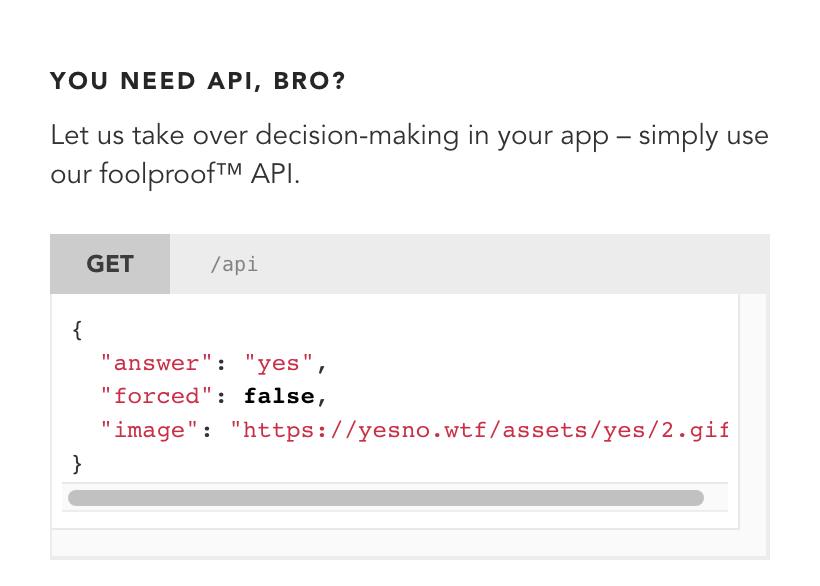



The first thing you should notice is that, whatever this is, it's using that dictionary data structure that we talked about last class to store its information. 

Once you recognize that, you should be able to parse the data the dictionary contains. More specifically, there are three key/value pairs:

| key   | value   |
| ----- | ------- |
| answer | yes |
| forced | false |
| image | https://yesno.wtf/assets/yes/2.gif |

Since you've already played around with the web version, you can (hopefully) quickly recognize what `"answer": "yes"` and `"image": "https://yesno.wtf/assets/yes/2.gif"` correspond to--

This is the "data" that determines what answer the web page displays (`"answer": "yes"`) and what .gif to load `"image": "https://yesno.wtf/assets/yes/2.gif"`.


### You're speaking in prose! 

(That was a joke for any English majors in the class). The real point is this: conveniently, the standard data format employed by APIs is called JSON (pronouned jay-sohn), and you can interpret it the same way as a Python Dictionary. While there are technical differences between JSON and Dictionaries, it's essentially the same syntax that can be manipulated in the same way: 

`{ "key": "value" }`

with multiple name/value pairs separated by commons, like so:

`{ "key1": "value1", "key2": "value2", "key3": "value3" }`

Or, formatted in a way that's slightly easier to read:

```
{ 
    "key1": "value1", 
    "key2": "value2", 
    "key3": "value3" 
}
```

So if we go back to the "Yes or No API" data, we can now see how it maps:

```
{ 
    "answer": "yes", 
    "forced": "false", 
    "image": "https://yesno.wtf/assets/yes/2.gif" 
}
```

But wait! We've discussed the meaning of `answer` and the meaning of `image`, but what about `forced`? This is where we'll take a look at the second half of the info provided by the API:

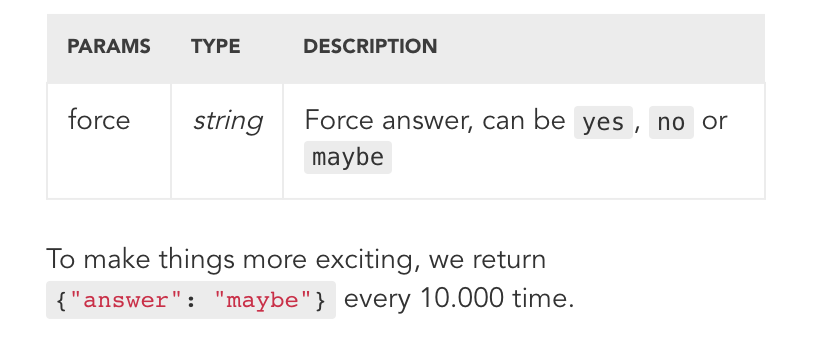

From this, we learn that `force` is a parameter of type `string` that, if set, would force the answer to be "yes", "no", or "maybe". It's not required, so we'll come back to how we might pass in parameters down below. 

But since we're going through all the documentation, such as it is, we might as well observe that, evidently, every ten (?) times, instead of randomizing the answer to be "yes" or "no," the API forces the answer to be "maybe." So we might also see the `forced` key be `true` in those contexts as well. We'll keep an eye on it. 

And just a note (which we'll confirm in class) is that working with APIs often involves a lot of studying exactly this type of information, which is often of varying clarity and quality. If any particular API documentation is confusing to you, rest assured that it's likely confusing to everyone who looks at it, and it's not just you who is spending an inordinate amount of time parsing its meaning. Most of the difficulty of working with APIs comes from figuring out the documentation. 

## Putting APIs to Work

Since we now understand how this particular API works, let's see if we can put it to work! 

In order to get started, we'll use that same `requests` library that we used last class:

In [ ]:
import requests # remember this from last class

url = "https://yesno.wtf/api/" # note the url is slightly different than the human-facing URL
response = requests.get(url)

response.text # print out the response as text, just as we did with our HTML in the previous lesson


Great! So we have our data. But is there something like BeautifulSoup that will parse it for us?

The answer is yes! `.json()` will turn any JSON data into a dictionary that we can then access using standard Python Dictionary syntax/functions: 

In [ ]:
data_dict = response.json() # this turns the json into a dictionary that can be accessed by key/value pairs

data_dict

But because our `data_dict` object is, as suggeted, a dictionary, and because the API documentation (and what's printed above) tells us the name of each key, we can also access each of these keys as follows:

In [ ]:
for key, value in data_dict.items(): # remember the .items() method from last class! 
  print("Key: " + key + "\t Value: " + str(data_dict[key]))

## A Very Important Decision Making Program

Now that we know how to "call" the API, and we know how to parse the results, let's use the API to give us the answer to a very important decision!

**EXERCISE 2: Write a Very Important Decision Making Program that:**
1. Calls the API using the requests library
2. Reads the resopnse into a dictionary 
3. Prints the answer to a very important question

The skeleton of this Very Important Decision Making Program is below. Just fill in the missing code:


In [ ]:
# Remember that we've already imported the requests library and 
# assigned the API url to the "url" variable up above, so we can 
# start with the call to the API 

response = requests.get(url) # Step 1: Call to the API to get a new set of data
data_dict =                  # Step 2: Convert the response to a dictionary (complete this line)

print("The answer to your very important decision is: ")

# Step 3, print the answer to the very important decision, using the data
# stored in the "answer" key of the data_dict
#
# Hint: Consult the dictionaries notebook if you forget how to access a specific key of a dict 

# more of your code here 


## A Deeper Dive into APIs

You can (hopefully) already start to see how this might be useful in text analysis projects. Especially given the amount of time that we've already spent learning how to scrape the web.

But how does it work?

Let's slow it down and look at all of the parts of our initial API call. 

In [ ]:
url = "https://yesno.wtf/api/"
response = requests.get(url)

response.text

Notice is that the call starts with a URL, just like a regular website. 

And you can [go to the same URL in your web browser](https://yesno.wtf/api/) and see the same thing as `response.text` rendeered in your browser.

So now let's talk a bit more about URLs

### URLs

A URL ("uniform resource locator") uniquely identifies a document on the web, and provides instructions for how to access it. Most of what we do on the web---whether we're using a web browser or writing a program that accesses the web---boils down to manipulating URLs.

It's important to understand the structure of URLs so we can take them apart and put them back together (both in our heads and programmatically). URLs have a conventional structure that is specified in Internet standards documentation, and many web APIs assume knowledge of this structure. So let's take the following URL:

    http://www.example.com/foo/bar?arg1=baz&arg2=quux
    
... and break it down into parts, so we have a common vocabulary.

| Part | Name |
|------|------|
| `http` | scheme |
| `www.example.com` | host |
| `/foo/bar` | path |
| `?arg1=baz&arg2=quux` | query string |

All of these parts are required, except for the query string, which is optional. Explanations:

* The *scheme* determines what *protocol* will be used to access this resource. For our purposes, this will almost always be `http` (HyperText Transfer Protocol) or `https` (HTTP, but over an encrypted connection).
* The *host* specifies which server on the Internet we're going to talk to in order to retrieve the document we want.
* The *path* names a resource on the server, often using slashes (`/`) to represent hierarchical relationships between resources. (Sometimes this corresponds to actual files on the server, but just as often it does not.)
* The *query string* is a means to tell the server *how* we want the document delivered. (More examples of this soon.)

Most of the work you'll do in learning how to use a web API is learning how to understsand, construct, and manipulate URLs. 

So let's give it a try with a URL that we now know and love:

**EXERCISE 3: Given the url "https://yesno.wtf/api/", identify the scheme, the host, and the path.** 

Your answer here! 

### Making use of the query string

You'll note that we have not yet used whatever that "query string" part of the URL describes in our calls to the Yes or No API. But that's about to change!

Remember up above how we noted that there is a parameter for `force`, with three possible values: "yes", "no", and "maybe"?

Let's now try to append a query string to our call so that we can force a `maybe` answer from the API. We'll do it like so: 

In [ ]:
url = "https://yesno.wtf/api/"

query_string = "?force=maybe" # using the query string formatting as described above

url += query_string # append the query strong to the original URL
# note: "+=" is a shortcut for url = "url + query_string"

response = requests.get(url)

response.text

It worked! 

And note that `forced` is now "true" since we forced the "maybe" response. 

### A Note about API Keys

Very often, when playing around with APIs, you will see this message (or one like it):

    {"message": "unauthorized", "type": "error"}

This message results from the fact that most web APIs (unlike most web pages) require some kind of *authentication*. 

In many APIs, this takes the form of a "token" or "key" (also sometimes called a "client ID" and/or "secret")---usually this information ends up as an extra parameter that you pass on the end of the URL. It identifies the request as having come from a unique user. 

So how do you get "keys" or "tokens"? There's usually some kind of sign-up form in or near the developer documentation for the service in question.

Different services have different requirements regarding how to include your keys in your request; you'll have to consult the documentation to know for sure. And truth be told, consult the documentation for the particular API you want to use is probably the most important lesson about learning to use APIs (and it's why most of the next quiz will involve just that). 

The API we'll be using for the next exercise, Wordnik, requires a key. For our purposes, we will use a pre-existing one which you'll see below. (For tomorrow's class, which involves using the Genius API, you'll need to sign up for a key of your own).  

### Making API requests with authentication

Here's an example of how to use `requests` with an api key included:

In [ ]:
# assign your api key to a variable named api_key
api_key = "a80a5131f7620c32a8919063dce09d01b6239543e3d0063bf"

# new URL here, since we're using a different API (at long last!)
url = "http://api.wordnik.com:80/v4/word.json/"

query_string = "snack/definitions?api_key=" + api_key # here's the query string; notice string concatination involved

# append the query strong to the original URL
url += query_string 

# make thec call
response = requests.get(url)

# format the response into a dict
data_dict = response.json()

# print it out
data_dict

There we go! We've got all the definitions for the word "snack"!

Now for your last exercise:

**EXERCISE 4: Can you use your newfound knowledge of Python Dictionaries to print out all of the definitions (and *only* the definitions) for the word "snack"?**


In [ ]:
for item in data_dict:
  # your code to print each definition here...




You did it! 

The combination of JSON, dictionaries, and for-loops is the magic stew that will allow us to automate the gathering of text from web APIs, making it very often the most convenient method for developing a corpus for performing data science with text.

And believe it or not, you now know (almost) everything you need to get started with real-world APIs.

Hurray!